In [2]:
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

from sklearn.cluster import KMeans

import wrangle_excs as wrangle

In [5]:
df = wrangle.wrangle_zillow()

In [6]:
df.head()

,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,regionidcity,...,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,heatingorsystemdesc,county
0,3.5,4.0,6.0,3100.0,6059.0,33634931.0,-117869207.0,4506.0,6.059063e+07,53571.0,...,1998.0,485713.0,1023282.0,2016.0,537569.0,11013.72,0.025595,2017-01-01,None,Orange
1,1.0,2.0,6.0,1465.0,6111.0,34449266.0,-119281531.0,12647.0,6.111001e+07,13091.0,...,1967.0,88000.0,464000.0,2016.0,376000.0,5672.48,0.055619,2017-01-01,None,Ventura
2,2.0,3.0,6.0,1243.0,6059.0,33886168.0,-117823170.0,8432.0,6.059022e+07,21412.0,...,1962.0,85289.0,564778.0,2016.0,479489.0,6488.30,0.005383,2017-01-01,None,Orange
3,3.0,4.0,8.0,2376.0,6037.0,34245180.0,-118240722.0,13038.0,6.037300e+07,396551.0,...,1970.0,108918.0,145143.0,2016.0,36225.0,1777.51,-0.103410,2017-01-01,Central,Los Angeles
4,3.0,3.0,8.0,1312.0,6037.0,34185120.0,-118414640.0,278581.0,6.037124e+07,12447.0,...,1964.0,73681.0,119407.0,2016.0,45726.0,1533.89,0.006940,2017-01-01,Central,Los Angeles


In [7]:
df.isnull().sum()

bathroomcnt                     0
bedroomcnt                      0
buildingqualitytypeid           0
calculatedfinishedsquarefeet    0
fips                            0
latitude                        0
longitude                       0
lotsizesquarefeet               0
rawcensustractandblock          0
regionidcity                    0
regionidcounty                  0
regionidzip                     0
roomcnt                         0
unitcnt                         0
yearbuilt                       0
structuretaxvaluedollarcnt      0
taxvaluedollarcnt               0
assessmentyear                  0
landtaxvaluedollarcnt           0
taxamount                       0
logerror                        0
transactiondate                 0
heatingorsystemdesc             0
county                          0
dtype: int64

In [8]:
df.head().T

,0,1,2,3,4
bathroomcnt,3.5,1.0,2.0,3.0,3.0
bedroomcnt,4.0,2.0,3.0,4.0,3.0
buildingqualitytypeid,6.0,6.0,6.0,8.0,8.0
calculatedfinishedsquarefeet,3100.0,1465.0,1243.0,2376.0,1312.0
fips,6059.0,6111.0,6059.0,6037.0,6037.0
latitude,33634931.0,34449266.0,33886168.0,34245180.0,34185120.0
longitude,-117869207.0,-119281531.0,-117823170.0,-118240722.0,-118414640.0
lotsizesquarefeet,4506.0,12647.0,8432.0,13038.0,278581.0
rawcensustractandblock,60590630.072012,61110010.023006,60590218.022012,60373001.001006,60371236.012
regionidcity,53571.0,13091.0,21412.0,396551.0,12447.0


In [9]:
county_df = pd.get_dummies(df.fips)
county_df.columns = ["LA","Orange","Ventura"]
df_dummies = pd.concat([df,county_df],axis = 1)
df_dummies = df_dummies.drop(columns = ["regionidcounty","county"])
df = df_dummies

In [10]:
df

,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,regionidcity,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,heatingorsystemdesc,LA,Orange,Ventura
0,3.5,4.0,6.0,3100.0,6059.0,33634931.0,-117869207.0,4506.0,6.059063e+07,53571.0,...,1023282.0,2016.0,537569.0,11013.72,0.025595,2017-01-01,None,0,1,0
1,1.0,2.0,6.0,1465.0,6111.0,34449266.0,-119281531.0,12647.0,6.111001e+07,13091.0,...,464000.0,2016.0,376000.0,5672.48,0.055619,2017-01-01,None,0,0,1
2,2.0,3.0,6.0,1243.0,6059.0,33886168.0,-117823170.0,8432.0,6.059022e+07,21412.0,...,564778.0,2016.0,479489.0,6488.30,0.005383,2017-01-01,None,0,1,0
3,3.0,4.0,8.0,2376.0,6037.0,34245180.0,-118240722.0,13038.0,6.037300e+07,396551.0,...,145143.0,2016.0,36225.0,1777.51,-0.103410,2017-01-01,Central,1,0,0
4,3.0,3.0,8.0,1312.0,6037.0,34185120.0,-118414640.0,278581.0,6.037124e+07,12447.0,...,119407.0,2016.0,45726.0,1533.89,0.006940,2017-01-01,Central,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77376,2.0,2.0,6.0,1286.0,6037.0,34245368.0,-118282383.0,47405.0,6.037101e+07,12447.0,...,354621.0,2016.0,283704.0,4478.43,0.020615,2017-09-20,Central,1,0,0
77377,2.0,4.0,6.0,1612.0,6111.0,34300140.0,-118706327.0,12105.0,6.111008e+07,27110.0,...,67205.0,2016.0,16522.0,1107.48,0.013209,2017-09-21,None,0,0,1
77378,1.0,3.0,4.0,1032.0,6037.0,34040895.0,-118038169.0,5074.0,6.037434e+07,36502.0,...,49546.0,2016.0,16749.0,876.43,0.037129,2017-09-21,Central,1,0,0
77379,2.0,3.0,6.0,1762.0,6037.0,33937685.0,-117996709.0,6347.0,6.037503e+07,14634.0,...,522000.0,2016.0,382000.0,6317.15,0.007204,2017-09-25,Central,1,0,0


### Iris dataset

In [50]:
df = sns.load_dataset("iris")

df["sepal_area"] = df.sepal_length * df.sepal_width
df["petal_area"] = df.petal_length * df.petal_width

In [51]:
train,validate,test = wrangle.train_validate_test_split(df)

In [52]:
train.shape, validate.shape, test.shape

((90, 7), (30, 7), (30, 7))

In [53]:
scaler,train,validate,test = wrangle.min_max_scaler(train, validate, test)

In [54]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area,petal_area
86,0.647059,0.55,0.649123,0.583333,versicolor,0.537962,0.457313
82,0.382353,0.35,0.508772,0.458333,versicolor,0.282717,0.300463
109,0.794118,0.80,0.894737,1.000000,virginica,0.795205,1.000000
147,0.588235,0.50,0.736842,0.791667,virginica,0.474525,0.679021
49,0.147059,0.65,0.070175,0.041667,setosa,0.324675,0.009265


In [55]:
X = train[["sepal_area","petal_area"]]
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X)
train["cluster"] = kmeans.predict(X)
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area,petal_area,cluster
86,0.647059,0.55,0.649123,0.583333,versicolor,0.537962,0.457313,0
82,0.382353,0.35,0.508772,0.458333,versicolor,0.282717,0.300463,3
109,0.794118,0.80,0.894737,1.000000,virginica,0.795205,1.000000,2
147,0.588235,0.50,0.736842,0.791667,virginica,0.474525,0.679021,0
49,0.147059,0.65,0.070175,0.041667,setosa,0.324675,0.009265,1


In [56]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area,petal_area,cluster
86,0.647059,0.55,0.649123,0.583333,versicolor,0.537962,0.457313,0
82,0.382353,0.35,0.508772,0.458333,versicolor,0.282717,0.300463,3
109,0.794118,0.80,0.894737,1.000000,virginica,0.795205,1.000000,2
147,0.588235,0.50,0.736842,0.791667,virginica,0.474525,0.679021,0
49,0.147059,0.65,0.070175,0.041667,setosa,0.324675,0.009265,1


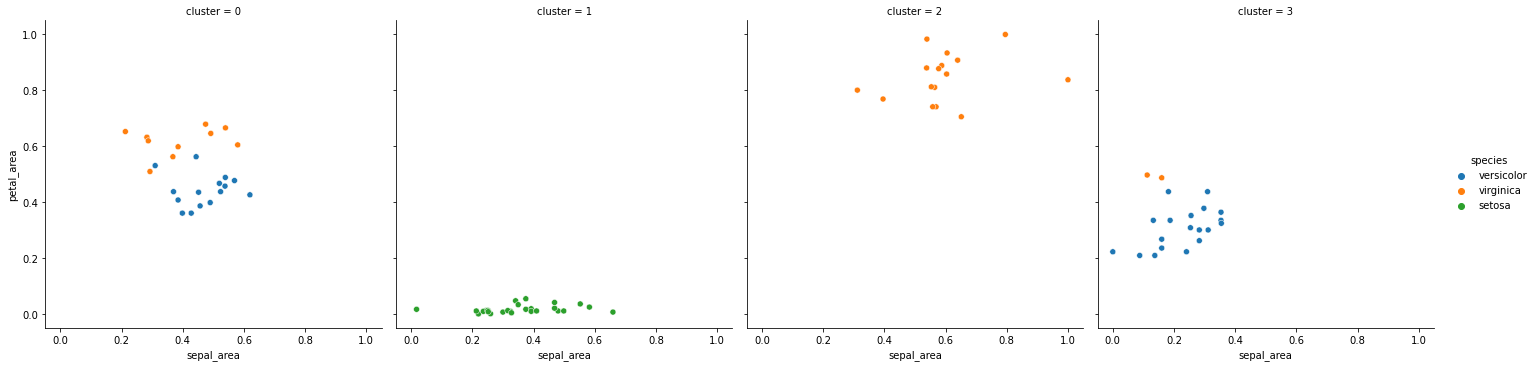

In [57]:
sns.relplot(data=train, x = "sepal_area", y = "petal_area", hue="species", col="cluster")

In [ ]:
def get_inertia(k):
    return Kmeans(k)

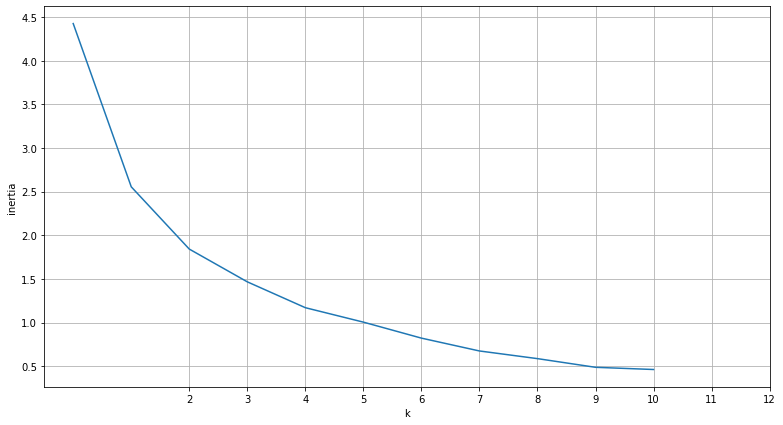

In [58]:
def get_inertia(k):
    return KMeans(k).fit(X).inertia_

plt.figure(figsize=(13, 7))

df = pd.Series([get_inertia(k) for k in range(2, 13)]).plot()

plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(range(2, 13))
plt.grid()

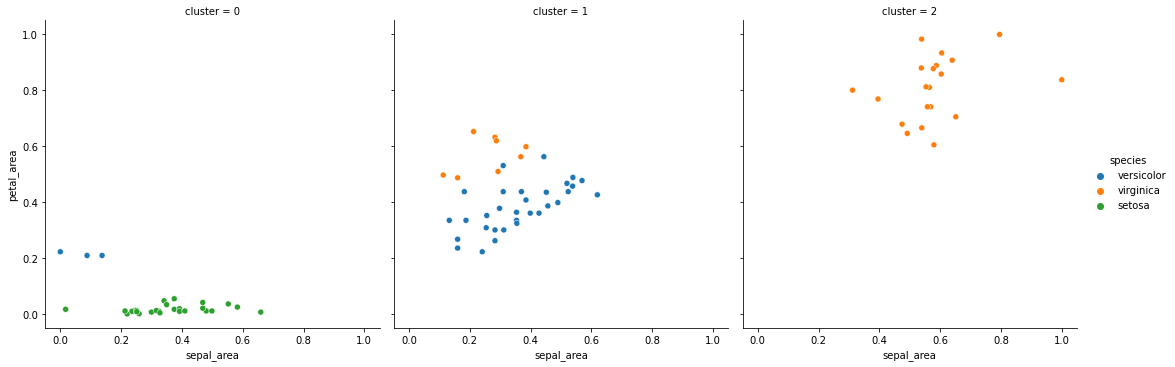

In [64]:
# Fit K-Means
X = train[["sepal_area", "petal_area", "sepal_length", "petal_width"]]
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

train['cluster'] = kmeans.labels_

# visualize w/ hue="species" style="cluster"
sns.relplot(x="sepal_area", y="petal_area", hue="species", col="cluster", col_wrap=3, data=train)

### Mall Dataset

In [70]:
df,train,validate,test = wrangle.wrangle_mall_df()

In [71]:
train.head()

,age,annual_income,spending_score,Male
customer_id,,,,
182,0.269231,0.738739,0.867347,0.0
49,0.211538,0.225225,0.418367,0.0
35,0.596154,0.162162,0.132653,0.0
186,0.230769,0.756757,0.979592,1.0
114,0.019231,0.441441,0.459184,1.0


In [72]:
train.shape, validate.shape, test.shape

((118, 4), (40, 4), (40, 4))

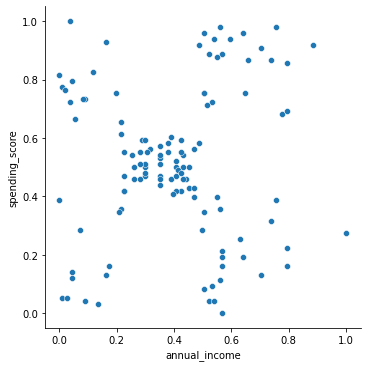

In [73]:
sns.relplot(x = "annual_income", y = "spending_score", data = train)

In [74]:
# probably want to use 5 based on the graph

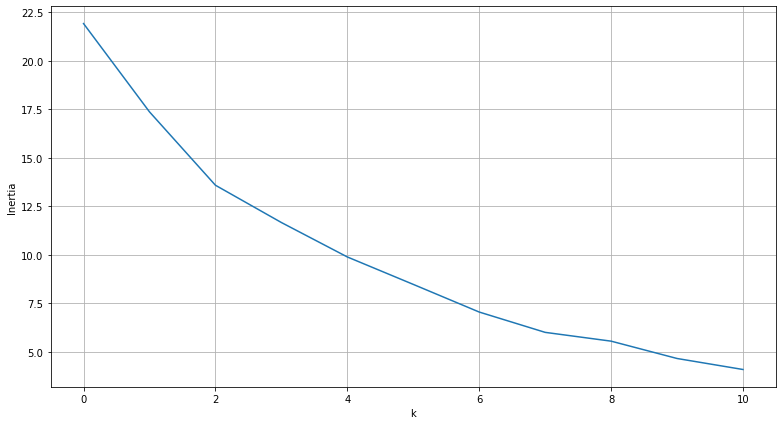

In [75]:
X = train.copy()

def get_inertia(k):
    return KMeans(k).fit(X).inertia_

plt.figure(figsize = (13,7))
df = pd.Series([get_inertia(k) for k in range (2,13)]).plot()

plt.xlabel("k")
plt.ylabel("Inertia")
plt.grid()

In [76]:
X = train.copy()
kmeans = KMeans(n_clusters = 5)

In [77]:
#sns.relplot(x = "age", y = "spending_score",style = "cluster", hue = "cluster", col = "gender")

In [81]:
# Looks like the sweet spot is 4, 5, or 6
# Let's start with and visualize kmeans clusters w/ k=5

# Fit K-Means
X = train.copy()
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

train['cluster'] = kmeans.labels_

train.head()

,age,annual_income,spending_score,Male,cluster
customer_id,,,,,
182,0.269231,0.738739,0.867347,0.0,4
49,0.211538,0.225225,0.418367,0.0,0
35,0.596154,0.162162,0.132653,0.0,2
186,0.230769,0.756757,0.979592,1.0,1
114,0.019231,0.441441,0.459184,1.0,1


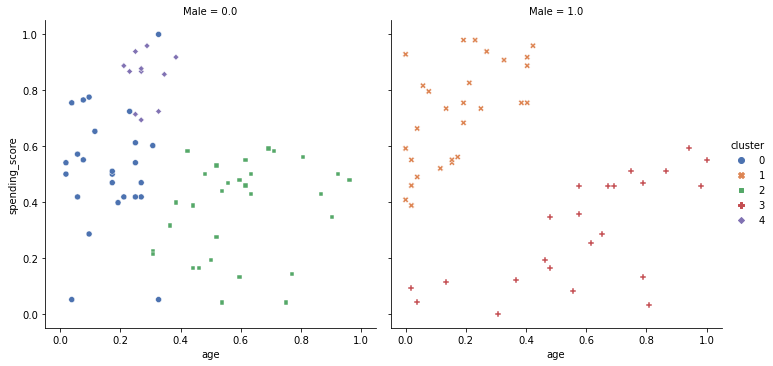

In [85]:
sns.relplot(x="age", y="spending_score", style="cluster", hue="cluster", col="Male", palette="deep", data=train)